In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("E:\ex1data2 (1).txt",names = ['size','bedrooms','price'])
data

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [3]:
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
data.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [5]:
data.index

RangeIndex(start=0, stop=47, step=1)

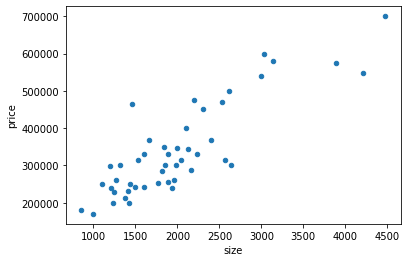

In [6]:
data.plot(kind = 'scatter',x = 'size', y ='price')

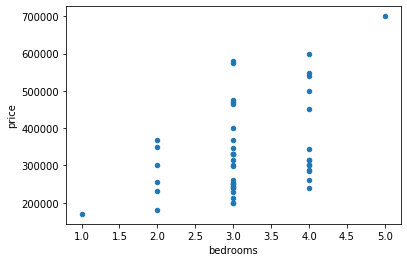

In [7]:
data.plot(kind = 'scatter',x = 'bedrooms',y='price')

In [8]:
def costcompute(X,y,theta):
    var = np.power(((X*theta.T)-y),2)
    return np.sum(var)/(2*len(X))

In [9]:
data.insert(0,'ones',1)

In [10]:
data.describe()

,ones,size,bedrooms,price
count,47.0,47.000000,47.000000,47.000000
mean,1.0,2000.680851,3.170213,340412.659574
std,0.0,794.702354,0.760982,125039.899586
min,1.0,852.000000,1.000000,169900.000000
25%,1.0,1432.000000,3.000000,249900.000000
50%,1.0,1888.000000,3.000000,299900.000000
75%,1.0,2269.000000,4.000000,384450.000000
max,1.0,4478.000000,5.000000,699900.000000


In [11]:
X = data.iloc[:,0:3]
y = data.iloc[:,3:4]

In [12]:
X = np.matrix(X)
Y = np.matrix(y)
theta = np.matrix(np.array([0,0,0]))

In [13]:
X

matrix([[   1, 2104,    3],
        [   1, 1600,    3],
        [   1, 2400,    3],
        [   1, 1416,    2],
        [   1, 3000,    4],
        [   1, 1985,    4],
        [   1, 1534,    3],
        [   1, 1427,    3],
        [   1, 1380,    3],
        [   1, 1494,    3],
        [   1, 1940,    4],
        [   1, 2000,    3],
        [   1, 1890,    3],
        [   1, 4478,    5],
        [   1, 1268,    3],
        [   1, 2300,    4],
        [   1, 1320,    2],
        [   1, 1236,    3],
        [   1, 2609,    4],
        [   1, 3031,    4],
        [   1, 1767,    3],
        [   1, 1888,    2],
        [   1, 1604,    3],
        [   1, 1962,    4],
        [   1, 3890,    3],
        [   1, 1100,    3],
        [   1, 1458,    3],
        [   1, 2526,    3],
        [   1, 2200,    3],
        [   1, 2637,    3],
        [   1, 1839,    2],
        [   1, 1000,    1],
        [   1, 2040,    4],
        [   1, 3137,    3],
        [   1, 1811,    4],
        [   1, 1437,

In [14]:
costcompute(X,y,theta)

price    6.559155e+10
dtype: float64

In [15]:
X.shape,theta.shape,y.shape

((47, 3), (1, 3), (47, 1))

In [16]:
def gradientdescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = 3
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j]= theta[0,j]-((alpha/len(X))*np.sum(term))
        theta = temp
        cost[i]= costcompute(X,y,theta)
    return theta,cost  

In [17]:
final_theta,cost_matrix = gradientdescent(X,y,theta,0.000000001,10)

In [18]:
final_theta

matrix([[3.33616517e-03, 7.48512537e+00, 1.09769662e-02]])

In [19]:
cost_matrix

array([6.50088805e+10, 6.44315852e+10, 6.38596129e+10, 6.32929143e+10,
       6.27314408e+10, 6.21751444e+10, 6.16239772e+10, 6.10778919e+10,
       6.05368417e+10, 6.00007802e+10])

In [20]:
cost_matrix[-1]

60000780232.06778

In [22]:
data.head()

,ones,size,bedrooms,price
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900
